In [47]:
import sympy as sp
x = sp.Symbol("x")
y = sp.sin(2*x**2)*sp.cos(x)
sp.simplify(sp.diff(y,x).subs({x:sp.pi}))

-4*pi*cos(2*pi**2)

In [48]:
y = sp.sin(2*x)*sp.cos(x)
sp.integrate(y,(x,0,sp.pi))

4/3

In [49]:
x,y = sp.symbols("x y")
eq1 = sp.Eq(5*x+3*y,10)
eq2 = sp.Eq(3*x-2*y,12)
sp.linsolve([eq1,eq2],(x,y))

{(56/19, -30/19)}

# Root Finding and Optimization Algorithms

[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/rootFinding.ipynb)

Often in science, we find ourselves wanting to do one of the following: (See figure below) 

1. Solve an equation for a specified variable.
2. Find the zeros of a function (equivalent to solving an equation that is equal to zero).
3. Find the extrema (maxima or minima) of a function.


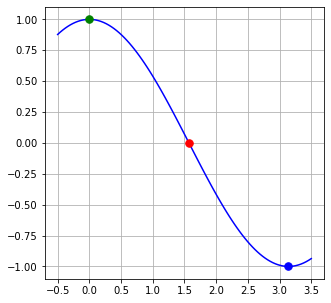

In [3]:
#| echo: false
#| fig-cap: "The zero(red dot), maximum (green dot), and minimum (blue dot) of a function are illustrated."
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.5,3.5,100)
y = np.cos(x)
plt.figure(figsize = (5,5))
plt.plot(x,y,'b-')
plt.plot([1.5707],[0],'r.',ms = 15)
plt.plot([3.14],[-1.0],'b.',ms = 15)
plt.plot([0],[1],'g.',ms = 15)
plt.grid()
plt.show()

These skills are routinely covered in an algebra class but often the equation we encounter cannot be solved using standard algebraic techniques. Instead we have to resort to a class of numerical algorithms generally referred to as root finding or optimization algorithms.  In the remainder of this chapter we will discuss various numerical methods for finding the roots of an equation.  The algorithms described below can be used to perform any of the tasks mentioned above. 

<!--  Finding the zero of this function means finding the x-value where the function is equal to zero (red dot).  Finding the min or max of the function means finding the x value where the slope of the function is zero (blue and green dots). When algebra techniques fail to solve the equation, we can use one of several numerical algorithms to solve it instead. 
You probably remember being asked to find the roots of a function in your math class. Finding the roots means finding the x values that make $y(x) = 0$. For example, the following polynomial equation has two solutions that can be found using the quadratic formula.

$$
4 x^2 + 2x - 2 = 0
$$

The solutions to this equation are $-1$ and ${1\over 2}$. Try plugging them into the equation above to verify this. -->
   

## Bisection  
![Used with permission from: https://commons.wikimedia.org/wiki/File:Bisection_method.svg](https://lancejnelson.github.io/PH135/figures/Bisection_method.png){width=60%}

The bisection method finds the roots of a function by iteratively narrowing the interval where the zero is found until the interval becomes sufficiently small. If you want to find the location where the function equals something other than zero, you can simply rearrange the function until a zero appears on the right hand side of the equation and proceed with bisection on the new function.  To begin the bisection method, the user must choose an interval wherein the function zero is guaranteed to be found.  The midpoint of the interval is then found and a new, narrower interval is chosen.  By repeating this process until the interval becomes sufficiently small, the algorithm eventually finds the location where the function is equal to zero.  The steps to the algorithm are as follows:  

1. Choose an interval wherein the function zero is certain to be located. Call the interval $(a,b)$
2. Calculate the midpoint of the interval $c = {a+ b \over 2}$
3. Calculate the function value at the midpoint ($f(c)$).
4. By examining the sign of $f(c)$ determine whether the interval $(a,c)$ or $(c,b)$ contains the zero of the function.
5. Repeat steps 2-4 until $f(c)$ is sufficiently small.

In the code cell below, try to use the bisection method to solve the following equation.
$$
y(x) = 5 x^2 - 3x - 2 = 0
$$

In [4]:
def y(x):
    return 5*x**2 - 3*x-2
import numpy as np
a = 0
b = 100
while abs(b-a) > 1e-6:
    xmid = (a+b)/2
    ymid = y(xmid)
    if np.sign(ymid)==np.sign(y(a)):
        a = xmid
    else:
        b = xmid
        
print(f"({xmid:2f},{y(xmid):.2f})")

(1.000000,-0.00)


## Newton's Method
![Used with permission from: https://commons.wikimedia.org/wiki/File:Newton_iteration.svg](https://lancejnelson.github.io/PH135/figures/Newtons_method.png){width=60%}

Newton's method uses the slope of the function to estimate a better approximation to the function's zero.  To understand how we can use the slope to approximate the zero, first let's write down an approximation to the slope of a function $f(x)$. 

$$
f'(x_0) \approx {f(x_1) - f(x_0) \over x_1 - x_0}
$$

If the slope of the function were a constant, we could simply set $f(x_1) = 0$ and solve for $x_1$ and we would be done.

$$
x_1 = x_0 - {f(x_0)\over f'(x_0)}
$$

In reality, the function will not have a constant slope but this equation will still get us closer to the zero than we were originally. (see figure)  By repeatedly evaluating the equation above, always using the most recent estimate as $x_0$, until $f(x_0)$ becomes sufficiently small, the location where the function is zero can be found. 
$$
x_{n+1} = x_n - {f(x_n)\over f'(x_n)}
$$

To begin the algorithm, the user must choose an  initial guess for the zero that isn't very far away from the true value.  An improvement on this initial guess is calculated using the equation above  where $f'(x_n)$ is the derivative of the function evaluated at the current guess.  The algorithm continues with repeated evaluation of the equation above until $f(x_n)$ evaluates to a sufficiently small number.

Below you will find a code example for solving the following equation:

$$
y(x) = \cos(x) = 0
$$

In [1]:
import numpy as np

x = 2.3

while abs(np.cos(x)) > 1e-5:
    x += np.cos(x)/np.sin(x) 

print(x,np.cos(x))

1.5707963256833193 1.1115773359029342e-09


If the function of interest has multiple zeros (like the cosine function we did above), one must give careful consideration to the initial guess.  Making a poor choice can lead to the algorithm finding a different zero than what was intended. 


## Fixed-Point Iteration
![Used with permission from: https://commons.wikimedia.org/wiki/File:Cosine_fixed_point.svg](https://lancejnelson.github.io/PH135/figures/Fixed_Point.png){width=60%}

Fixed-point iteration is another algorithm for finding function zeros. To begin, the function of interest must be rearranged to look similar to the function below.
$$
x = \cos(x)
$$
As opposed to the alternate form:

$$
y(x) = x - \cos(x) = 0
$$

If the function cannot be manipulated to look like the form above, it is not a good candidate for the fixed-point iteration method.  Once the equation is in this form, the user must choose an initial guess for the zero just as with the other algorithms.  The algorithm then proceeds by using the initial guess to evaluate the right hand side of the equation.  This process repeats with the new guess always being used to evaluate the function until $|x - \cos(x)|$ is sufficiently small.   The equation given above is an example of a transcendental equation, or an equation that cannot be solved using algebraic techniques. No matter how hard you try, you'll never come up with an expression that solves this equation.

The code cell below shows the fixed-point iteration algorithm used to find the zeros of the function mentioned above: $x = \cos(x)$

In [6]:
import numpy as np
x = 3
count = 0
while abs(x - np.cos(x)) > 1e-5:
  x = np.cos(x)
  count += 1

To find the zeros of a function that is not in the form: $x = f(x)$, you must first algebraically manipulate the equation to take this form. For example, the following equation

$$
2x^3 - 2 x - 5 =0 
$$

Is equivalent to:
$$
x = (x+{5\over 2})^{1\over 3}
$$

And the fixed-point iteration algorithm can now be used to solve for $x$:

In [7]:
import numpy as np
x = 3
count = 0
while abs(x - (x+5/2)**(1/3)) > 1e-8:
    x = (x+5/2)**(1/3)
    count += 1
    if count > 10000:
        break

## Finding Extrema

Any of the methods discussed above can be used to find extrema by finding the zeros of the derivative.  For example, to find the minimum of this function:

$$
y(x) = 5 x^3 - 2x^2 - 8 x + 2 
$$

We can find the zeros of the derivative function:

$$
y'(x) = 15 x^2 - 4 x - 8
$$

And then used fixed-point iteration, or any of the other methods discussed, to solve this equation for $x$:


In [8]:
import numpy as np
x = 3
count = 0
while abs(x - np.sqrt(4/15 * x + 8/15)) > 1e-8:
    x = np.sqrt(4/15 * x + 8/15)
    count += 1
    if count > 10000:
      print("Too many iterations. Results may not be correct!")
      break
print(x)

0.8757019168612669


## Exercises
1. Use the bisection method to find the zeros of the function $$ y(x) = 8x^3 - 15 x^2 - 4 x + 5$$
Hint: This function has three zeros; one in the region [-1,0], one in the region [0,1] and another in the region [1.5,2.5]

In [9]:
import numpy as np
def y(x):
    return 8*x**3 - 15*x**2-4*x+5

a = -1
b = 0
while abs(a-b)>1e-9:
    xmid = (a+b)/2
    if np.sign(y(xmid)) == np.sign(y(a)):
        a = xmid
    else:
        b = xmid
print(xmid,y(xmid))

a = 0
b = 1
while abs(a-b)>1e-9:
    xmid = (a+b)/2
    if np.sign(y(xmid)) == np.sign(y(a)):
        a = xmid
    else:
        b = xmid
print(xmid,y(xmid))

a = 1.5
b = 2.5
while abs(a-b)>1e-9:
    xmid = (a+b)/2
    if np.sign(y(xmid)) == np.sign(y(a)):
        a = xmid
    else:
        b = xmid
print(xmid,y(xmid))

-0.6118317591026425 1.8531602918869794e-09
0.5191504592075944 -4.033573475226149e-09
1.9676813008263707 1.6265985891550372e-08


2. Use Newton's method to find the zero for the following function (slightly different from the one in problem 1) $$y(x) = 8x^3 - 15 x^2 - 4 x - 5$$
then use `sympy` to solve the equation and verify that the answer are the same.  
Answer: You should find that the zero is located at $\approx 2.2257$  
Hint: The derivative of this function is:
$$
y'(x) = 24 x^2 - 20 x - 4
$$

In [2]:
import sympy as sp
def y(x):
    return 8*x**3 - 15*x**2 - 4*x-5
def yp(x):
    return 24*x**2-20*x-4
x = 3
while abs(y(x))>1e-9:
    x = x-y(x)/yp(x)
print(x,y(x))
x = sp.Symbol("x")
y = 8*x**3 - 15*x**2 - 4*x -5
sp.N(sp.solveset(y,x))

2.2257952919836232 8.075868862533753e-10


{2.22579529196684, -0.175397645983421 - 0.50003417391955*I, -0.175397645983421 + 0.50003417391955*I}

3. Use fixed-point iteration to solve the following equation$$\left({1\over 2}\right)^x = x^2$$

In [11]:
x = 5
while abs(x**2-(1/2)**(x)) >1e-9:
    x = (1/2)**(1/2*x)
print(x)
x = 5
while abs(x**2-(1/2)**(x)) >1e-9:
    x = -(1/2)**(1/2*x)
print(x)

0.7666646955676868
-1.9999999992601514


4. Use Newton's method to solve the following equation $$e^x = \cos(x)$$
Note: This function has three solutions; one in the region [-5,-4], one in the region [-2,-1] and another in the region [-1,1]. See if you can find all of them by varying your initial guess.

In [12]:
def y(x):
    return np.exp(x)-np.cos(x)
def yp(x):
    return np.exp(x)+np.sin(x)
x = -4
while abs(y(x)) > 1e-9:
    x = x-y(x)/yp(x)
print(x)
x = -2
while abs(y(x)) > 1e-9:
    x = x-y(x)/yp(x)
print(x)
x =0.5
while abs(y(x)) > 1e-9:
    x = x-y(x)/yp(x)
print(x)

-4.721292758847686
-1.2926957194226605
2.9701450707245274e-15


5. Use a method of your choosing to find the **minimum** of the function $$y(x) = 10 x^2 \cos(\sqrt{x})$$
Hint: If you choose to use the bisection method, you'll need the first derivative of this function. If you choose to use Newton's method, you'll need the first and second derivatives of this function.  Both of these functions are given below.

$$
y'(x) = 20 x \cos(\sqrt{x}) - 5 x^{3/2} \sin(\sqrt{x})
$$

$$
y''(x) = 20 \cos(\sqrt{x}) - {5\over 2} x \cos(\sqrt{x}) - {35\over 2} \sqrt{x} \sin(\sqrt{x})
$$

In [15]:
def f(x):
    return 10*x**2*np.cos(np.sqrt(x))
def fp(x):
    return 20*x*np.cos(np.sqrt(x))-5*x**(3/2)*np.sin(np.sqrt(x))
def fdp(x):
    return 20*np.cos(np.sqrt(x))-5/2*x*np.cos(np.sqrt(x))-35/2*np.sqrt(x)*np.sin(np.sqrt(x))

x = 20
while abs(fp(x))>1e-9:
    x = x-fp(x)/fdp(x)
print(x,f(x))

15.4854972347763 -1681.735180354786
